# 다중 객체 추적 알고리즘 : ByteTrack!
- Object Detection 시 탐지 박스가 폐색되는 경우가 발생한다. <br> <br>
- 탐지 박스의 ID가 폐색 후 변하는 문제를 해결해야한다.

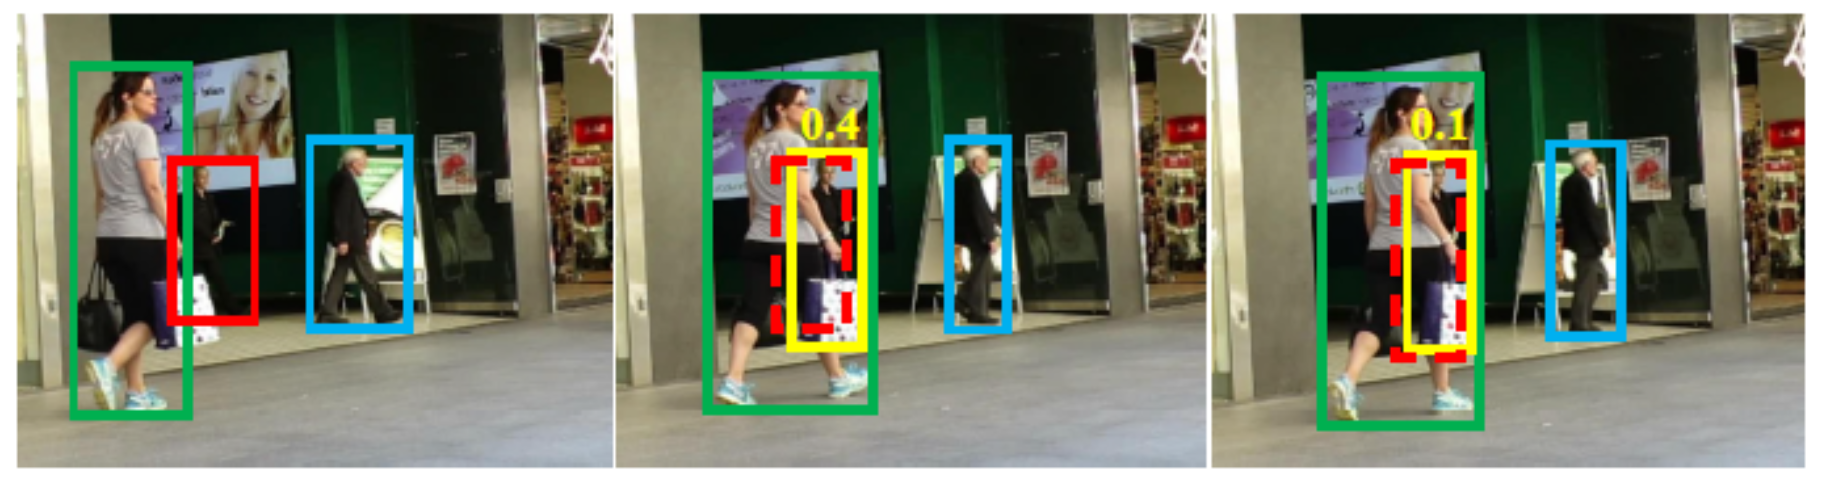

# 아래는 실행 결과 영상입니다.

![ 실행영상 ](assets/2.gif)

# 라이브러리 불러오기

In [12]:
import cv2
import numpy as np
import torch
from models.common import DetectMultiBackend
from utils.torch_utils import select_device
from utils.general import set_logging
import track
import supervision as sv
from models.common import DetectMultiBackend, AutoShape

# 영상 실행 함수 정의

In [13]:
def process_webcam(model, config=dict(conf=0.1, iou=0.45, classes=None), counting_zone=None, show_labels=False):
    cap = cv2.VideoCapture("running3.mp4")  
    ret, frame = cap.read()
    if not ret:
        print("영상을 시작할 수 없습니다.")
        return
    
    video_info = sv.VideoInfo(fps=30,
                              width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                              height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                              total_frames=0)

    model, _ = track.setup_model_and_video_info(model, config, None)
    byte_tracker = track.create_byte_tracker(video_info)
    annotators_list, trace_annotator, label_annotator, dot_annotator = track.setup_annotators()
    polygon_zone, polygon_zone_annotator = track.setup_counting_zone(counting_zone, video_info) if counting_zone else (None, None)
    def callback(frame, index):
        frame_rgb = frame[..., ::-1]
        results = model(frame_rgb, size=608, augment=False)
        detections = track.ExtendedDetections.from_yolov9(results)
        return track.annotate_frame(frame, index, video_info, detections, byte_tracker, counting_zone, polygon_zone, polygon_zone_annotator, trace_annotator, annotators_list, label_annotator, show_labels, model, dot_annotator)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        annotated_frame = callback(frame, None)
        cv2.imshow('Processed Webcam Feed', annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 영상 추적 실행

In [14]:
model_path = 'gelan-c-det.pt'  # 모델 경로 설정
device = select_device('cuda:0')  # 'cpu'나 'cuda:0' 같은 디바이스 설정
model = DetectMultiBackend(model_path, device=device, dnn=False)
model = AutoShape(model)

process_webcam(model)

YOLOv5  b255915 Python-3.8.18 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
Adding AutoShape... 


TypeError: __init__() got an unexpected keyword argument 'track_thresh'

# 전체 프레임에 대해 추적 및 카운팅 함수 정의

In [ ]:
def process_webcam(model, config=dict(conf=0.1, iou=0.45, classes=None), counting_zone='whole_frame', show_labels=False):
    cap = cv2.VideoCapture("test.mp4")  
    ret, frame = cap.read()
    if not ret:
        print("영상을 시작할 수 없습니다.")
        return
    
    video_info = sv.VideoInfo(fps=30,
                              width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                              height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                              total_frames=0)

    model, _ = track.setup_model_and_video_info(model, config, None)
    byte_tracker = track.create_byte_tracker(video_info)
    annotators_list, trace_annotator, label_annotator, dot_annotator = track.setup_annotators()
    polygon_zone, polygon_zone_annotator = track.setup_counting_zone(counting_zone, video_info) if counting_zone else (None, None)
    def callback(frame, index):
        frame_rgb = frame[..., ::-1]
        results = model(frame_rgb, size=608, augment=False)
        detections = track.ExtendedDetections.from_yolov9(results)
        return track.annotate_frame(frame, index, video_info, detections, byte_tracker, counting_zone, polygon_zone, polygon_zone_annotator, trace_annotator, annotators_list, label_annotator, show_labels, model, dot_annotator)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        annotated_frame = callback(frame, None)
        cv2.imshow('Processed Webcam Feed', annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
model_path = 'best_555.pt'  # 모델 경로 설정
device = select_device('cpu')  # 'cpu'나 'cuda:0' 같은 디바이스 설정
model = DetectMultiBackend(model_path, device=device, dnn=False)
model = AutoShape(model)

process_webcam(model)

# 특정 구역 내에 대해 추적 및 카운팅 함수 정의

In [ ]:
def process_webcam(model, config=dict(conf=0.1, iou=0.45, classes=None), counting_zone=[[100, 50], [400, 50], [400, 250], [100, 250]] , show_labels=False):
    cap = cv2.VideoCapture("test.mp4")  
    ret, frame = cap.read()
    if not ret:
        print("영상을 시작할 수 없습니다.")
        return
    
    video_info = sv.VideoInfo(fps=30,
                              width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                              height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                              total_frames=0)

    model, _ = track.setup_model_and_video_info(model, config, None)
    byte_tracker = track.create_byte_tracker(video_info)
    annotators_list, trace_annotator, label_annotator, dot_annotator = track.setup_annotators()
    polygon_zone, polygon_zone_annotator = track.setup_counting_zone(counting_zone, video_info) if counting_zone else (None, None)
    def callback(frame, index):
        frame_rgb = frame[..., ::-1]
        results = model(frame_rgb, size=608, augment=False)
        detections = track.ExtendedDetections.from_yolov9(results)
        return track.annotate_frame(frame, index, video_info, detections, byte_tracker, counting_zone, polygon_zone, polygon_zone_annotator, trace_annotator, annotators_list, label_annotator, show_labels, model, dot_annotator)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        annotated_frame = callback(frame, None)
        cv2.imshow('Processed Webcam Feed', annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
model_path = 'best_555.pt'  # 모델 경로 설정
device = select_device('cpu')  # 'cpu'나 'cuda:0' 같은 디바이스 설정
model = DetectMultiBackend(model_path, device=device, dnn=False)
model = AutoShape(model)

process_webcam(model)